<a href="https://colab.research.google.com/github/jmcava/jmcava/blob/main/zona_283_dep_estadual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Zona 283**

In [2]:
import pandas as pd

# Caminho do arquivo CSV
file_path = '/content/votacao_candidato.csv'

# Carregar o arquivo com a codificação adequada e o separador correto
try:
    df = pd.read_csv(file_path, encoding='utf-8', sep=';')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='latin1', sep=';')

# Exibir as colunas para confirmação
print("Colunas disponíveis no arquivo:")
print(df.columns)

# Filtrar apenas os candidatos eleitos e reeleitos com base na situação de totalização
# Certifique-se de ajustar os valores de acordo com a nomenclatura do seu arquivo
df_eleitos = df[df['Situação totalização'].str.contains('Eleito', case=False, na=False)]

# Selecionar colunas relevantes
df_eleitos = df_eleitos[['Nome candidato', 'Partido', 'Cargo', 'Votos nominais']]

# Ordenar por votos nominais de forma decrescente
df_eleitos_sorted = df_eleitos.sort_values(by='Votos nominais', ascending=False)

# Mostrar os primeiros registros para validação
print(df_eleitos_sorted.head())

# Salvar o resultado em um novo arquivo CSV
df_eleitos_sorted.to_csv('/content/candidatos_eleitos.csv', index=False, encoding='utf-8')


Colunas disponíveis no arquivo:
Index(['Ano de eleição', 'Cargo', 'Município', 'Partido', 'Zona',
       'Situação totalização', 'Nome candidato', 'UF', 'Votos nominais',
       'Data de carga'],
      dtype='object')
                        Nome candidato    Partido              Cargo  \
1731             CARLA SARDANO MORANDO       PSDB  Deputado Estadual   
1490         EDUARDO MATARAZZO SUPLICY         PT  Deputado Estadual   
1823   LUIZ FERNANDO TEIXEIRA FERREIRA         PT  Deputado Estadual   
1487        TEONÍLIO MONTEIRO DA COSTA         PT  Deputado Estadual   
1064  ANA CAROLINA ROSSI BARRETO SERRA  CIDADANIA  Deputado Estadual   

      Votos nominais  
1731           13880  
1490            2555  
1823            2446  
1487            1387  
1064            1323  


In [3]:
# Verifique os valores únicos na coluna de Situação totalização para identificar o termo correto
print(df['Situação totalização'].unique())

# Ajustar o filtro para incluir apenas candidatos eleitos
df_eleitos_corrigido = df[df['Situação totalização'].isin(['Eleito', 'Eleito por Média', 'Eleito por QP'])]

# Recontar o total de candidatos eleitos
total_eleitos_corrigido = len(df_eleitos_corrigido)
print(f"Total de candidatos eleitos: {total_eleitos_corrigido}")


['Suplente' 'Eleito' 'Não Eleito']
Total de candidatos eleitos: 94


In [4]:
# Filtrar apenas os candidatos eleitos
df_eleitos = df[df['Situação totalização'] == 'Eleito']

# Selecionar as colunas necessárias e ordená-las
df_final = df_eleitos[['Nome candidato', 'Partido', 'Votos nominais']]

# Exibir as primeiras linhas do resultado
print(df_final.head())

# Salvar o resultado em um novo arquivo CSV, se necessário
df_final.to_csv('/content/candidatos_eleitos_filtrados.csv', index=False, encoding='utf-8')


                Nome candidato       Partido  Votos nominais
10         DIMAS MECCA SAMPAIO            PL             562
24       PAULO ROBERTO FIORILO            PT              54
41  SEBASTIÃO DOS SANTOS FILHO  REPUBLICANOS               4
65   ROBERVAL CONTE LOPES LIMA            PL             495
68    RAFAEL FERNANDO ZIMBALDI     CIDADANIA              11


In [5]:
# Filtrar apenas os candidatos eleitos
df_eleitos = df[df['Situação totalização'] == 'Eleito']

# Selecionar as colunas necessárias
df_final = df_eleitos[['Nome candidato', 'Partido', 'Votos nominais']]

# Ordenar os candidatos pela coluna 'Votos nominais' de forma decrescente
df_final_sorted = df_final.sort_values(by='Votos nominais', ascending=False)

# Exibir as primeiras linhas do resultado ordenado
print(df_final_sorted.head())

# Salvar o resultado em um novo arquivo CSV, se necessário
df_final_sorted.to_csv('/content/candidatos_eleitos_ordenados.csv', index=False, encoding='utf-8')


                        Nome candidato    Partido  Votos nominais
1731             CARLA SARDANO MORANDO       PSDB           13880
1490         EDUARDO MATARAZZO SUPLICY         PT            2555
1823   LUIZ FERNANDO TEIXEIRA FERREIRA         PT            2446
1487        TEONÍLIO MONTEIRO DA COSTA         PT            1387
1064  ANA CAROLINA ROSSI BARRETO SERRA  CIDADANIA            1323


In [6]:
# Filtrar os candidatos eleitos e selecionar as colunas necessárias
df_eleitos = df[df['Situação totalização'] == 'Eleito']
df_final = df_eleitos[['Nome candidato', 'Partido', 'Votos nominais']]

# Ordenar os candidatos pela coluna 'Votos nominais' de forma decrescente
df_final_sorted = df_final.sort_values(by='Votos nominais', ascending=False)

# Enumerar os candidatos na ordem, começando pelo número 1
df_final_sorted['Posição'] = range(1, len(df_final_sorted) + 1)

# Exibir as primeiras linhas do resultado com a numeração
print(df_final_sorted.head())

# Salvar o resultado em um novo arquivo CSV, se necessário
df_final_sorted.to_csv('/content/candidatos_eleitos_ordenados_com_numeracao.csv', index=False, encoding='utf-8')


                        Nome candidato    Partido  Votos nominais  Posição
1731             CARLA SARDANO MORANDO       PSDB           13880        1
1490         EDUARDO MATARAZZO SUPLICY         PT            2555        2
1823   LUIZ FERNANDO TEIXEIRA FERREIRA         PT            2446        3
1487        TEONÍLIO MONTEIRO DA COSTA         PT            1387        4
1064  ANA CAROLINA ROSSI BARRETO SERRA  CIDADANIA            1323        5


In [7]:
# Filtrar os candidatos eleitos e selecionar as colunas necessárias
df_eleitos = df[df['Situação totalização'] == 'Eleito']
df_final = df_eleitos[['Nome candidato', 'Partido', 'Votos nominais']]

# Ordenar os candidatos pela coluna 'Votos nominais' de forma decrescente
df_final_sorted = df_final.sort_values(by='Votos nominais', ascending=False)

# Enumerar os candidatos na ordem, começando pelo número 1
df_final_sorted['Posição'] = range(1, len(df_final_sorted) + 1)

# Reorganizar as colunas para garantir que 'Posição' seja a primeira
df_final_sorted = df_final_sorted[['Posição', 'Nome candidato', 'Partido', 'Votos nominais']]

# Exibir as primeiras linhas do resultado com a numeração
print(df_final_sorted.head())

# Salvar o resultado em um novo arquivo CSV, se necessário
df_final_sorted.to_csv('/content/candidatos_eleitos_ordenados_com_numeracao.csv', index=False, encoding='utf-8')


      Posição                    Nome candidato    Partido  Votos nominais
1731        1             CARLA SARDANO MORANDO       PSDB           13880
1490        2         EDUARDO MATARAZZO SUPLICY         PT            2555
1823        3   LUIZ FERNANDO TEIXEIRA FERREIRA         PT            2446
1487        4        TEONÍLIO MONTEIRO DA COSTA         PT            1387
1064        5  ANA CAROLINA ROSSI BARRETO SERRA  CIDADANIA            1323


In [8]:
# Exibir o índice das linhas do DataFrame final para ver de onde elas vêm
print(df_final_sorted.index)


Index([1731, 1490, 1823, 1487, 1064,  660,  739, 1054, 1179,  169, 1181,   10,
       1248,  991,   65,  382,  120,  402,  209,  919, 1257, 1111, 1210, 1199,
       1894, 1722,  829, 1642,  959,  598,  139, 1047, 1364,  644,   71,  799,
        928,  836,  581, 1604,   93,  392,  654, 1203, 1153, 1066,   24, 1848,
        531, 1855, 1262,  407,  802,  422,  844,  543, 1440,  830, 1005, 1325,
        597, 1209,  414,  985, 1219,  849,  389,  121,  807,  809, 1856, 1853,
       1772, 1474,  930,  532,   68, 1026, 1162, 1814, 1171, 1063, 1810, 1792,
        848, 1258, 1260,  159,   41,  230, 1417, 1177, 1809,  757],
      dtype='int64')


In [9]:
# Resetando o índice para ser sequencial e começando do 0
df_final_sorted_reset = df_final_sorted.reset_index(drop=True)

# Exibindo o DataFrame com o novo índice sequencial
print(df_final_sorted_reset.head())


   Posição                    Nome candidato    Partido  Votos nominais
0        1             CARLA SARDANO MORANDO       PSDB           13880
1        2         EDUARDO MATARAZZO SUPLICY         PT            2555
2        3   LUIZ FERNANDO TEIXEIRA FERREIRA         PT            2446
3        4        TEONÍLIO MONTEIRO DA COSTA         PT            1387
4        5  ANA CAROLINA ROSSI BARRETO SERRA  CIDADANIA            1323


In [10]:
# Exibir o DataFrame sem o índice
print(df_final_sorted.to_string(index=False))


 Posição                         Nome candidato       Partido  Votos nominais
       1                  CARLA SARDANO MORANDO          PSDB           13880
       2              EDUARDO MATARAZZO SUPLICY            PT            2555
       3        LUIZ FERNANDO TEIXEIRA FERREIRA            PT            2446
       4             TEONÍLIO MONTEIRO DA COSTA            PT            1387
       5       ANA CAROLINA ROSSI BARRETO SERRA     CIDADANIA            1323
       6                 PAULA NUNES DOS SANTOS          PSOL             901
       7                  THIAGO REIS AURICCHIO            PL             854
       8                 BRUNO ZAMBELLI SALGADO            PL             808
       9                            TOME ABDUCH  REPUBLICANOS             806
      10                CARLOS ALBERTO GIANNASI          PSOL             747
      11              ALTAIR MORAES DE OLIVEIRA  REPUBLICANOS             604
      12                    DIMAS MECCA SAMPAIO            PL   

In [12]:
# prompt: Usando o DataFrame df: barras

import altair as alt

# Create the bar chart
chart = alt.Chart(df).mark_bar().encode(
    x=alt.X('Partido', sort='-y'),  # Sort the parties by descending vote count
    y='sum(Votos nominais)',  # Aggregate votes for each party
    color='Partido',  # Color bars according to party
    tooltip=['Partido', 'sum(Votos nominais)']  # Add tooltips for details
).properties(
    title='Votos Nominais por Partido'  # Add a title to the chart
)

chart


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: Futu

alt.Chart(...)

In [21]:
!pip install matplotlib

<ipython-input-27-8d944a028bf2>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  bars = plt.bar(df['Partido'], df['Votos'], color=plt.cm.get_cmap('tab20').colors)


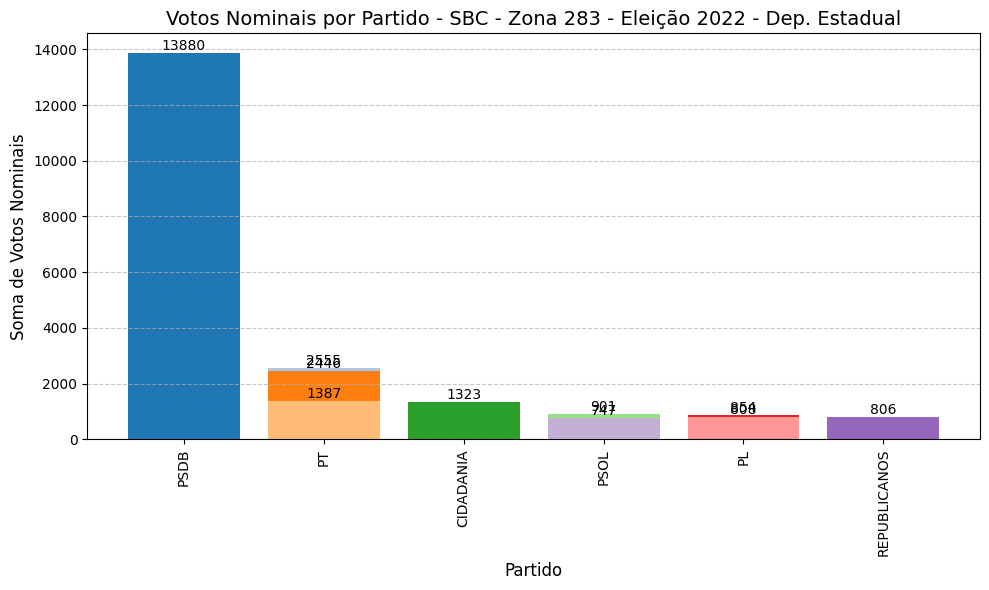

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# ... (dados e criação do DataFrame como antes)

plt.figure(figsize=(10, 6))

df.rename(columns={'Votos Nominais': 'Votos'}, inplace=True)
bars = plt.bar(df['Partido'], df['Votos'], color=plt.cm.get_cmap('tab20').colors)

plt.xlabel('Partido', fontsize=12)
plt.ylabel('Soma de Votos Nominais', fontsize=12)
plt.title('Votos Nominais por Partido - SBC - Zona 283 - Eleição 2022 - Dep. Estadual', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adiciona os valores acima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0f}', # Formata o número como inteiro
             ha='center', va='bottom')


plt.show()

In [26]:
print(df.columns)  # Imprime os nomes das colunas do seu DataFrame

Index(['Posição', 'Nome Candidato', 'Partido', 'Votos Nominais'], dtype='object')


In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# ... (seu código para carregar os dados no DataFrame df)

# Agrupa por partido e soma os votos (corrigido)
df_agregado = df.groupby('Partido')['Votos nominais'].sum().reset_index()

# Ordena por votos (opcional, mas melhora a visualização)
df_agregado = df_agregado.sort_values('Votos nominais', ascending=False)


plt.figure(figsize=(12, 6))  # Ajuste o tamanho conforme necessário

bars = plt.bar(df_agregado['Partido'], df_agregado['Votos Nominais'], color=plt.colormaps['tab20'].colors)

plt.xlabel('Partido', fontsize=12)
plt.ylabel('Soma de Votos nominais', fontsize=12)
plt.title('Votos Nominais por Partido - SBC - Zona 283 - Eleição 2022 - Dep. Estadual', fontsize=14)
plt.xticks(rotation=90, ha='right')  # Rotação dos rótulos do eixo x
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)



for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0f}',
             ha='center', va='bottom')

plt.show()

KeyError: 'Column not found: Votos nominais'

In [31]:
print(df.columns)

Index(['Posição', 'Nome Candidato', 'Partido', 'Votos'], dtype='object')


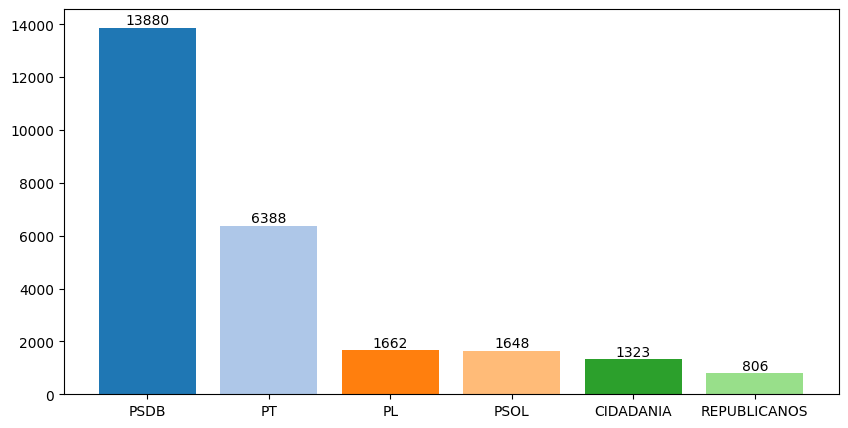

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# ... (seu código para carregar e criar o DataFrame df)

df_agregado = df.groupby('Partido')['Votos'].sum().reset_index()  # Corrigido

# Ordena por votos (opcional)
df_agregado = df_agregado.sort_values('Votos', ascending=False)  # Corrigido


plt.figure(figsize=(10, 5))

bars = plt.bar(df_agregado['Partido'], df_agregado['Votos'], color=plt.colormaps['tab20'].colors) # Corrigido

# ... (resto do seu código com as correções, se necessário)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0f}',
             ha='center', va='bottom')

plt.show()

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (seu código para carregar os dados no DataFrame df)


print("DataFrame original (df):")
print(df)  # Imprime todo o DataFrame original
print("\nNúmero de linhas no DataFrame original:", len(df))
print("\nValores ausentes no DataFrame original:")
print(df.isnull().sum())


# Agrupa por partido e soma os votos
df_agregado = df.groupby('Partido')['Votos'].sum().reset_index()

print("\nDataFrame agregado (df_agregado):")
print(df_agregado)  # Imprime o DataFrame após o groupby

# ... (resto do seu código para criar o gráfico)

DataFrame original (df):
   Posição                    Nome Candidato       Partido  Votos
0        1             CARLA SARDANO MORANDO          PSDB  13880
1        2         EDUARDO MATARAZZO SUPLICY            PT   2555
2        3   LUIZ FERNANDO TEIXEIRA FERREIRA            PT   2446
3        4        TEONÍLIO MONTEIRO DA COSTA            PT   1387
4        5  ANA CAROLINA ROSSI BARRETO SERRA     CIDADANIA   1323
5        6            PAULA NUNES DOS SANTOS          PSOL    901
6        7             THIAGO REIS AURICCHIO            PL    854
7        8            BRUNO ZAMBELLI SALGADO            PL    808
8        9                       TOME ABDUCH  REPUBLICANOS    806
9       10           CARLOS ALBERTO GIANNASI          PSOL    747

Número de linhas no DataFrame original: 10

Valores ausentes no DataFrame original:
Posição           0
Nome Candidato    0
Partido           0
Votos             0
dtype: int64

DataFrame agregado (df_agregado):
        Partido  Votos
0     CIDADAN

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Crie o DataFrame (substitua por seu código de carregamento)
data = { # Dados fornecidos por você
    # ... (seus dados)
}
df = pd.DataFrame(data)

# Agrupa por partido e soma os votos
df_agregado = df.groupby('Partido')['Votos'].sum().reset_index()

# Ordena os dados (opcional)
df_agregado = df_agregado.sort_values('Votos', ascending=False)


# Cria o gráfico
plt.figure(figsize=(12, 6))
bars = plt.bar(df_agregado['Partido'], df_agregado['Votos'], color=plt.colormaps['tab20'].colors) # Use df_agregado aqui!


plt.xlabel('Partido', fontsize=12)
plt.ylabel('Soma de Votos Nominais', fontsize=12)
plt.title('Votos Nominais por Partido - SBC - Zona 283', fontsize=14)
plt.xticks(rotation=90, ha='right')  # Rotação dos rótulos do eixo x
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0f}', ha='center', va='bottom')

plt.show()

KeyError: 'Partido'